In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, make_scorer
)


# Load Dataset and Initial Inspection  
Load the SECOM dataset from Google Drive, convert the target labels to binary (0 = fail, 1 = pass), and check the basic shape and distribution of the target variable.


In [ ]:
# Load the dataset from Google Drive
file_path = "../data/uci-secom.csv"
df = pd.read_csv(file_path)

# Convert labels: 0 = fail, 1 = pass
df['Pass/Fail'] = df['Pass/Fail'].replace({1: 0, -1: 1}) # Pass = 1 , Fail = 0

# Show basic info
print("Data shape:", df.shape)
print(df['Pass/Fail'].value_counts())
df.head()

Data shape: (1567, 592)
Pass/Fail
1    1463
0     104
Name: count, dtype: int64


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.933631
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# Visualize Missing Data  
Explore the percentage of missing values per feature to identify columns with excessive NaNs, which might need special handling or removal.


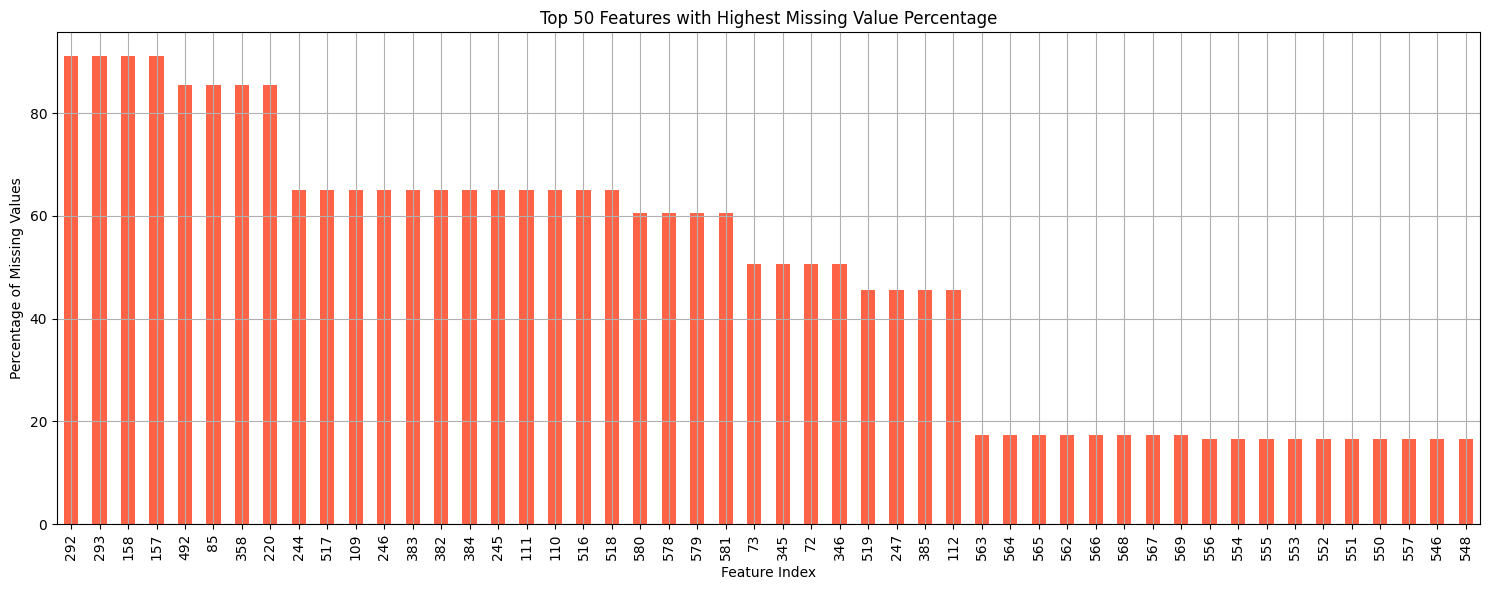


Number of columns with > 50% NaNs: 28


In [4]:
features_only = df.drop(columns=['Pass/Fail', 'Time'])
missing_percent = features_only.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
missing_percent[:50].plot(kind='bar', color='tomato')
plt.title("Top 50 Features with Highest Missing Value Percentage")
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Feature Index")
plt.grid(True)
plt.tight_layout()
plt.show()

high_nan_columns = missing_percent[missing_percent > 50]
print(f"\nNumber of columns with > 50% NaNs: {len(high_nan_columns)}")


# Correlation Analysis of High-NaN Features  
Check the correlation of features with more than 50% missing values against the target variable to decide whether to keep or drop them.


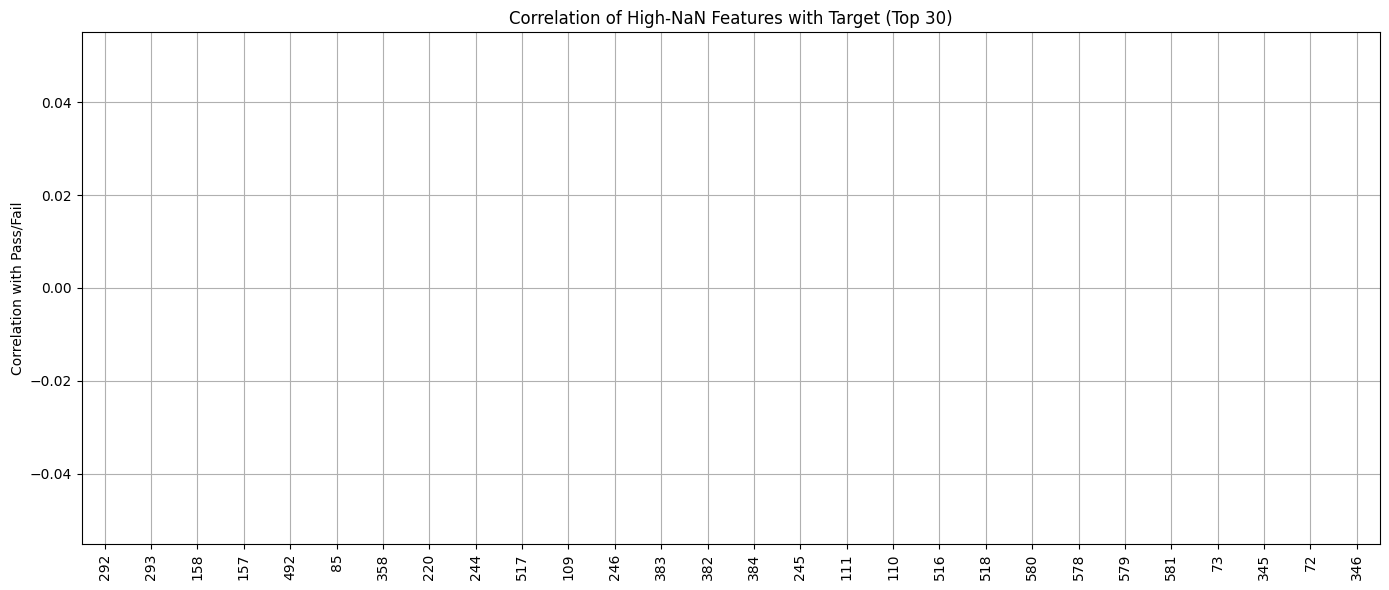

292   NaN
293   NaN
158   NaN
157   NaN
492   NaN
85    NaN
358   NaN
220   NaN
244   NaN
517   NaN
109   NaN
246   NaN
383   NaN
382   NaN
384   NaN
245   NaN
111   NaN
110   NaN
516   NaN
518   NaN
580   NaN
578   NaN
579   NaN
581   NaN
73    NaN
345   NaN
72    NaN
346   NaN
Name: Pass/Fail, dtype: float64


In [5]:
high_nan_features = high_nan_columns.index.tolist()
corr_df = df[high_nan_features + ['Pass/Fail']]

# Drop NaNs for correlation calculation
corr_matrix = corr_df.dropna().corr()
target_corr = corr_matrix['Pass/Fail'].drop('Pass/Fail').sort_values(key=abs, ascending=False)

plt.figure(figsize=(14, 6))
target_corr[:30].plot(kind='bar', color='teal')
plt.title("Correlation of High-NaN Features with Target (Top 30)")
plt.ylabel("Correlation with Pass/Fail")
plt.grid(True)
plt.tight_layout()
plt.show()

print(target_corr)


# Drop High-NaN Columns  
Remove columns with more than 50% missing values as identified with low or no correlation to the target variable, to reduce noise and complexity.


In [6]:
df_cleaned = df.drop(columns=high_nan_features)

print(f"Original shape: {df.shape}")
print(f"New shape after dropping {len(high_nan_features)} columns: {df_cleaned.shape}")


Original shape: (1567, 592)
New shape after dropping 28 columns: (1567, 564)


# Feature Importance Filtering  
Use an ExtraTreesClassifier to compute feature importances and select features that cumulatively contribute to 98% of the importance for model training.


In [7]:
X = df_cleaned.drop(columns=['Pass/Fail', 'Time'])
y = df_cleaned['Pass/Fail']

X_temp = X.fillna(X.median())

et_model = ExtraTreesClassifier(n_estimators=300, random_state=42)
et_model.fit(X_temp, y)

importances = et_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_idx])
selected_indices = sorted_idx[cumulative_importance <= 0.98]
selected_features = X.columns[selected_indices]

print(f"Selected {len(selected_features)} features covering 98% of importance out of {X.shape[1]}.")


Selected 424 features covering 98% of importance out of 562.


# Impute Missing Values  
Apply KNN imputation to fill remaining missing values in the selected features for clean and complete input data.


In [8]:
X_selected = X[selected_features]
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X_selected)
X_final = pd.DataFrame(X_imputed, columns=selected_features)

print("Imputation done. Any remaining NaNs:", np.isnan(X_final.values).sum())


Imputation done. Any remaining NaNs: 0


# Train/Test Split and Feature Scaling  
Split the dataset into training and test sets while maintaining class distribution and apply standard scaling to features for models sensitive to feature scale.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaling complete.")

Data split and scaling complete.


# Train and Evaluate Models  
Train multiple classification models on the training set, make predictions on the test set, and compute evaluation metrics including accuracy, precision, recall, F1 score, and ROC AUC.


In [10]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=5, random_state=42)
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVC", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
results_df


c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:16:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,XGBoost,0.936306,0.936102,1.000000,0.966997,0.673980
1,Random Forest,0.933121,0.933121,1.000000,0.965404,0.731107
2,KNN,0.929936,0.935691,0.993174,0.963576,0.514383
3,SVC,0.923567,0.935275,0.986348,0.960133,0.678206
4,Decision Tree,0.907643,0.952055,0.948805,0.950427,0.641069
5,Logistic Regression,0.888535,0.954225,0.924915,0.939341,0.687307
6,GaussianNB,0.216561,0.927273,0.174061,0.293103,0.602633


# Cross-Validation for Robust Evaluation  
Perform stratified 5-fold cross-validation on all models to obtain more reliable and stable performance metrics across multiple data splits.


In [11]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    if name in ['Logistic Regression', 'SVC', 'KNN']:
        pipeline = Pipeline([('scaler', StandardScaler()), ('clf', model)])
    else:
        pipeline = Pipeline([('clf', model)])

    scores = {}
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        if metric == 'precision':
            scoring = make_scorer(precision_score, zero_division=0)
        elif metric == 'recall':
            scoring = make_scorer(recall_score, zero_division=0)
        elif metric == 'f1':
            scoring = make_scorer(f1_score, zero_division=0)
        else:
            scoring = metric

        cv_score = cross_val_score(pipeline, X_final, y, cv=skf, scoring=scoring)
        scores[metric] = (np.mean(cv_score), np.std(cv_score))

    cv_results.append({
        'Model': name,
        'Accuracy Mean': scores['accuracy'][0],
        'Accuracy Std': scores['accuracy'][1],
        'Precision Mean': scores['precision'][0],
        'Precision Std': scores['precision'][1],
        'Recall Mean': scores['recall'][0],
        'Recall Std': scores['recall'][1],
        'F1 Mean': scores['f1'][0],
        'F1 Std': scores['f1'][1],
        'ROC AUC Mean': scores['roc_auc'][0],
        'ROC AUC Std': scores['roc_auc'][1],
    })

cv_df = pd.DataFrame(cv_results).sort_values(by='F1 Mean', ascending=False).reset_index(drop=True)
cv_df


c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:53] WARNI

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Mean,F1 Std,ROC AUC Mean,ROC AUC Std
0,Random Forest,0.933632,0.001239,0.933632,0.001239,1.000000,0.000000,0.965676,0.000662,0.668855,0.057069
1,XGBoost,0.933632,0.001239,0.933632,0.001239,1.000000,0.000000,0.965676,0.000662,0.693998,0.024076
2,KNN,0.928532,0.004219,0.934406,0.001503,0.993169,0.004313,0.962887,0.002278,0.619019,0.041578
3,SVC,0.921507,0.001485,0.936214,0.002987,0.982916,0.003722,0.958986,0.000834,0.670463,0.038993
4,Decision Tree,0.887039,0.004912,0.936881,0.004661,0.942585,0.009255,0.939676,0.002900,0.524388,0.031908
5,Logistic Regression,0.842386,0.009804,0.941925,0.007428,0.885862,0.008927,0.912993,0.005605,0.662281,0.036775
6,GaussianNB,0.222783,0.058277,0.941162,0.023013,0.179160,0.067290,0.295417,0.090714,0.579175,0.096433


# Plot ROC Curves with Cross-Validation  
This cell generates ROC curves for each model based on 5-fold stratified cross-validation.  
- Gray lines show ROC curves from individual folds, reflecting variability.  
- The bold blue line represents the mean ROC curve averaged over folds.  
- The plot title and legend display the model name along with the mean AUC and its standard deviation across folds.  
This visualization helps assess model performance stability and discrimination ability more reliably than a single train-test split.


c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:13] WARNI

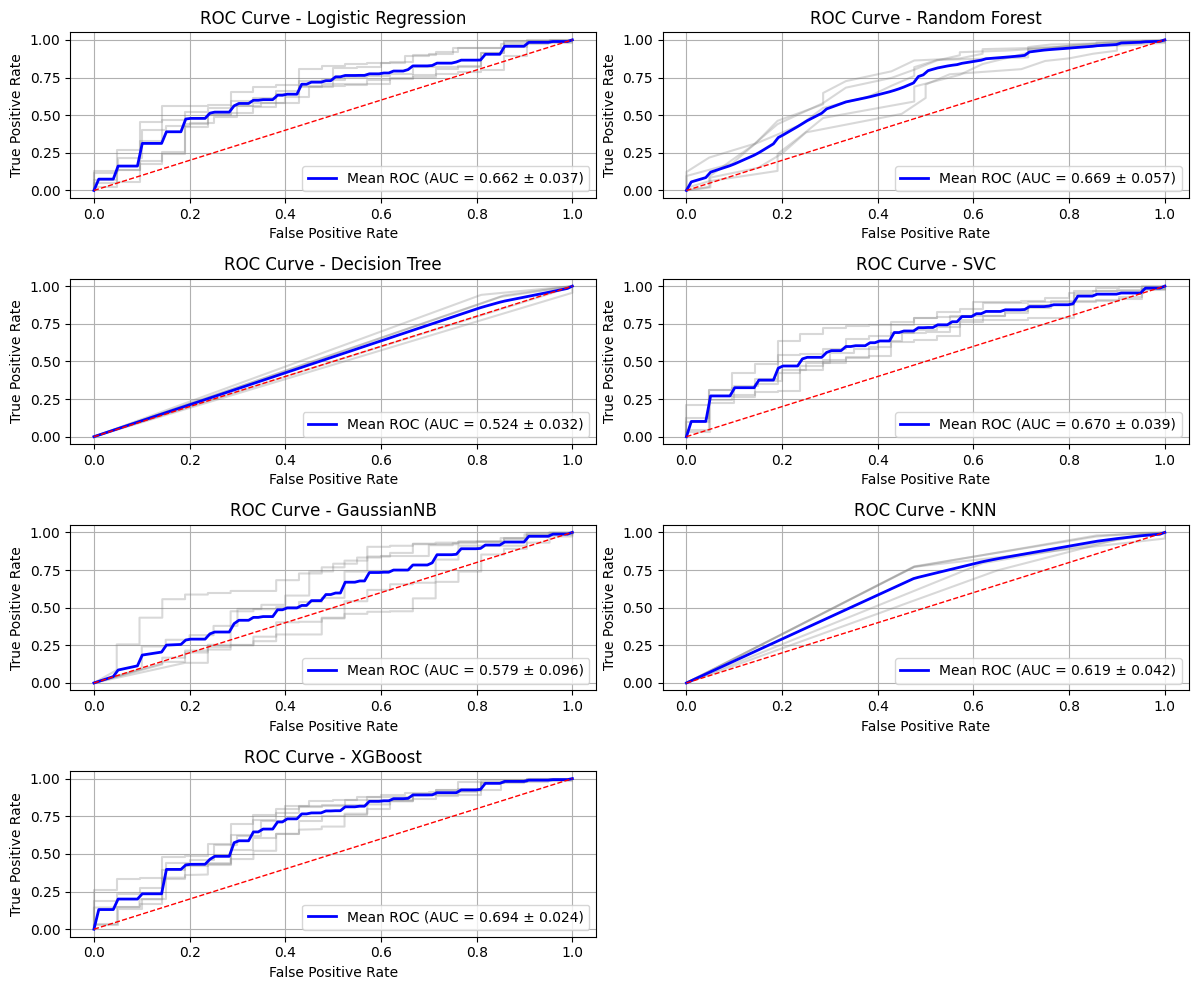

In [12]:
plt.figure(figsize=(12, 10))

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for i, (name, model) in enumerate(models.items()):
    plt.subplot(4, 2, i + 1)

    if name in ['Logistic Regression', 'SVC', 'KNN']:
        pipeline = Pipeline([('scaler', StandardScaler()), ('clf', model)])
    else:
        pipeline = Pipeline([('clf', model)])

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in skf.split(X_final, y):
        X_train_cv, X_test_cv = X_final.iloc[train_idx], X_final.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train_cv, y_train_cv)
        y_prob = pipeline.predict_proba(X_test_cv)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

        fold_auc = roc_auc_score(y_test_cv, y_prob)
        aucs.append(fold_auc)

        plt.plot(fpr, tpr, color='grey', alpha=0.3)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=f'Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', lw=1)

    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Visualize Cross-Validation Performance  
Create side-by-side bar plots comparing the F1 scores and ROC AUC metrics of all models based on cross-validation results for easy performance comparison.


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_8312\890002362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Mean', y='Model', data=cv_df, palette='viridis')
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_8312\890002362.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC AUC Mean', y='Model', data=cv_df, palette='magma')


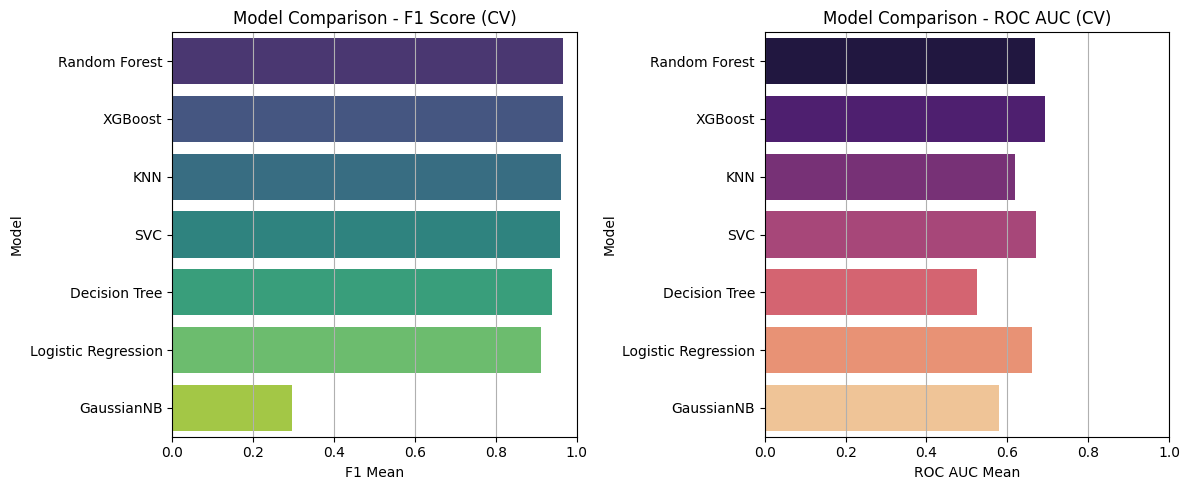

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x='F1 Mean', y='Model', data=cv_df, palette='viridis')
plt.title('Model Comparison - F1 Score (CV)')
plt.xlim(0, 1)
plt.grid(axis='x')

plt.subplot(1, 2, 2)
sns.barplot(x='ROC AUC Mean', y='Model', data=cv_df, palette='magma')
plt.title('Model Comparison - ROC AUC (CV)')
plt.xlim(0, 1)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


### Best 3 Models Selected

After evaluating multiple classification models on the SECOM dataset, the following three models showed the best overall performance:

1. **XGBoost**
   - Highest ROC AUC score (≈ 0.694)
   - Excellent F1 score and accuracy
   - Very stable performance across folds

2. **Random Forest**
   - Tied with XGBoost for best F1 score and accuracy
   - Strong and consistent performance
   - Handles high-dimensional data well

3. **SVC (Support Vector Classifier)**
   - Third-highest ROC AUC score (≈ 0.670)
   - High precision and recall
   - Solid F1 score with good generalization

These models were chosen based on their scores for **F1**, **ROC AUC**, and **accuracy**, as well as their stability across cross-validation. They are well-suited for detecting failures in the manufacturing process using sensor data.


### Best Metric to Evaluate Model Performance

For this task, the best metric to use is the **F1 Score**.

The dataset (UCI SECOM) is imbalanced — meaning there are a lot more "good" products than "bad" ones. If we only look at accuracy, a model might look good just because it's predicting everything as "good."

But in real life, **missing a faulty product** (a false negative) can be very expensive. At the same time, we also don’t want too many false alarms (false positives), because that wastes time and resources.

The **F1 Score** gives us a balance between **precision** (how many predicted failures were actually failures) and **recall** (how many actual failures we caught). That’s why it’s the most useful metric here.

---

### Business Benefit of Solving This Problem

Solving this problem helps the business in many ways:

- **Catch problems early**: We can find faulty products before they move further down the production line or get shipped.
- **Save money**: Catching defects early means less rework, less waste, and fewer returns from customers.
- **Improve the process**: The data helps us see which sensors are linked to failures. This can lead to better settings and more stable production.
- **Reduce manual checks**: The model can help quality control teams by flagging which products to inspect more closely.
- **Make customers happier**: Fewer bad products means better quality, fewer complaints, and less damage to the brand.

In short, this model can **save time, reduce cost, and improve product quality** in the manufacturing process.
